In [ ]:
##Importing Libraries


import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import plotly.graph_objects as go
from sklearn.metrics import f1_score,fbeta_score
from sklearn.metrics import precision_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

##Importing Libraries


import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import plotly.graph_objects as go











In [ ]:
##Importing the dataset downloaded from kaggle

data = pd.read_csv('Churn_Modelling.csv')


##Display the first few rows of the dataset
print(data.head())

##Summary statistics of numerical columns
print(data.describe())

##Data types of columns
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())





   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

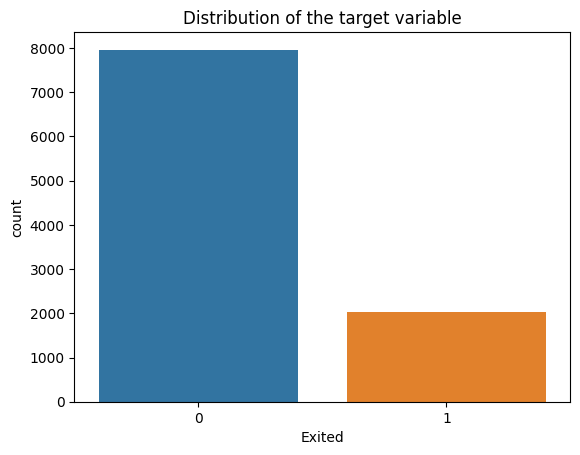

In [ ]:
# Visualize the target variable
sns.countplot(x='Exited', data=data)
plt.title('Distribution of the target variable')
plt.show()


<ipython-input-6-39f7bb2b844e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


Correlation values:
                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumbe

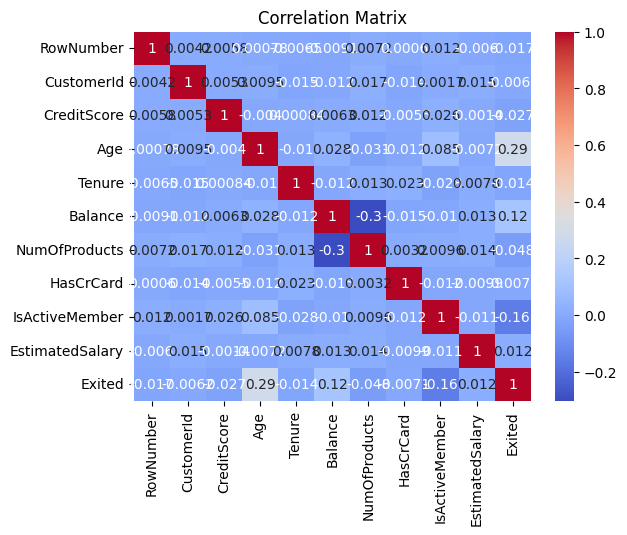

In [ ]:
# Visualize the distribution of the numerical variables

corr = data.corr()
print("Correlation values:")
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


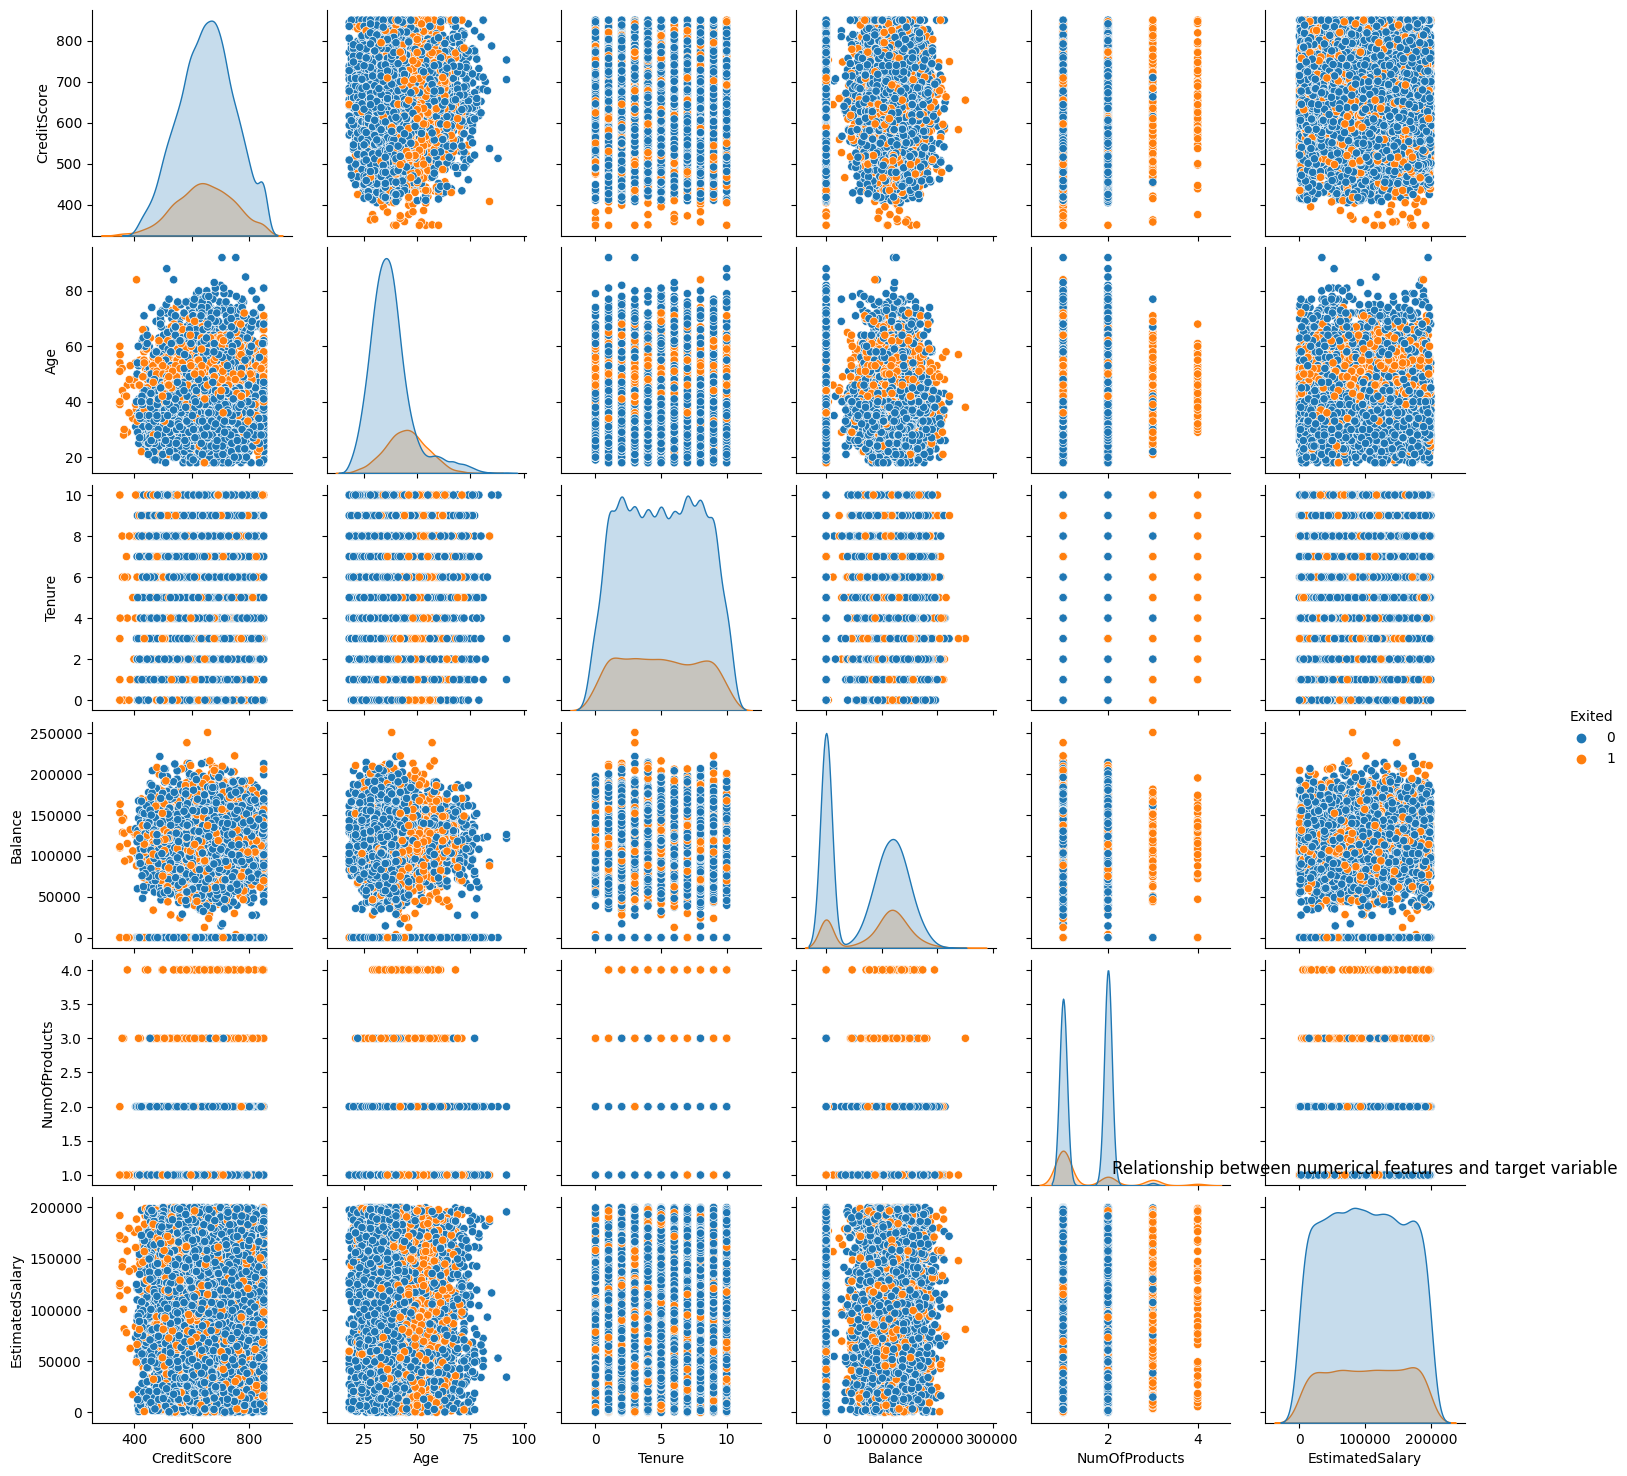

In [ ]:
# Visualize the relationship between numerical features and target variable
sns.pairplot(data, hue='Exited', vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])
plt.title('Relationship between numerical features and target variable')
plt.show()

#EDA insights 

The code creates a histogram for each numerical variable, and a count plot for each categorical variable, showing how the distribution of each variable differs for customers who churned versus those who did not churn.

These visualizations can help us identify which demographic and behavioral factors are associated with churn and how they vary across different customer segments. For example, we can observe that:

Customers who churned tend to have lower credit scores, lower tenure, and higher number of products compared to those who did not churn.

Customers who churned tend to have higher balances and higher estimated salaries compared to those who did not churn.

Customers from Germany have a higher churn rate compared to those from France or Spain.

Female customers have a higher churn rate compared to male customers.


Customers with a credit card or an active membership have a lower churn rate compared to those without.


##LOGISTIC REGRESSION

<!-- LOGISTIC REGRESSION -->

Confusion Matrix:
[[1526   69]
 [ 309   96]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000


Accuracy: 0.811
Confusion matrix:
 [[1526   69]
 [ 309   96]]
AUC: 0.7721490769766631
F1-score: 0.3368421052631579
F2-score: 0.26890756302521013
Precision: 0.5818181818181818
Recall: 0.23703703703703705


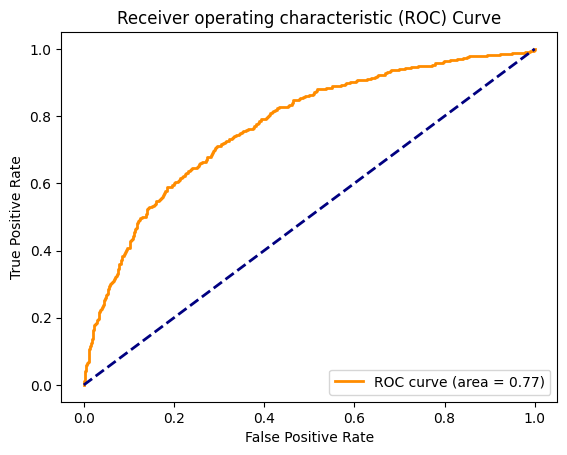

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Prepare the data
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

# One-hot encode categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X = ct.fit_transform(X)

# Avoid dummy variable trap by removing one column from each one-hot encoded variable
X = X[:, 1:]

# Scale the variables
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the logistic regression model
classifier = LogisticRegression(random_state=0)

# Fit the model to the training set
classifier.fit(X_train, y_train)

# Predict the target variable on test set
y_pred = classifier.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}\n")
print(f"Classification Report:\n{cr}\n")

# calculate evaluation metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
auc_score = auc(fpr, tpr)
f1 = f1_score(y_test, y_pred)
fbeta = fbeta_score(y_test, y_pred, beta=2)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# print evaluation metrics
print("Accuracy:", acc)
print("Confusion matrix:\n", cm)
print("AUC:", auc_score)
print("F1-score:", f1)
print("F2-score:", fbeta)
print("Precision:", precision)
print("Recall:", recall)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Model Insights:

Looking at the classification report, we can see that the model has an overall accuracy of 0.811, which means that it correctly classified 81.1% of the samples. However, it's important to note that accuracy alone can be misleading if the classes are imbalanced, as is the case here, where there are significantly more samples for the negative class (churn=0) than the positive class (churn=1). Therefore, we need to look at other metrics such as precision, recall, and F1-score, to evaluate the model's performance.

 The precision of the model is 0.58, which means that when it predicts a customer to churn, it is correct about 58% of the time. The recall is 0.24, which means that out of all the actual churn cases, the model only identified 24%. The F1-score is 0.34, which is a harmonic mean of precision and recall, providing an overall measure of the model's performance.

 Looking at the confusion matrix, we can see that out of 1595 actual negative cases, the model correctly identified 1526, and incorrectly classified 69 as positive. Out of 405 actual positive cases, the model correctly identified only 96 and missed 309.

 The AUC (Area Under the Curve) score is 0.772, which indicates that the model has moderate predictive power. Finally, we can see that the F2-score is lower than the F1-score, which means that the model is placing more emphasis on precision than recall, and is giving more weight to false positives than false negatives.

Overall, the model has room for improvement, particularly in terms of correctly identifying churned customers. We may need to tune the hyperparameters or try a different algorithm to improve the model's performance.



##xgBoost

In [ ]:
##XGBoost Model

from sklearn.model_selection import GridSearchCV

# Model Definition
xgb_model = XGBClassifier(random_state=42)


# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
}

# Create the GridSearchCV object
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
xgb_grid.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", xgb_grid.best_params_)

# Make predictions on testing data using the best model
y_pred = xgb_grid.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

# Print results
print("\nAccuracy: {:.2f}%".format(accuracy * 100))
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification)


Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Accuracy: 86.40%

Confusion Matrix:
 [[1518   77]
 [ 195  210]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.52      0.61       405

    accuracy                           0.86      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



# Model Insights:


Grid search was used to find the best hyperparameters for the model. The best hyperparameters found by GridSearchCV are learning rate = 0.1, max depth = 3, and n estimators = 200.

The XGBoost model achieved an accuracy of 86.40%, which means that the model predicted the outcome correctly for 86.40% of the observations in the test set. The confusion matrix shows that there were 1518 true negatives (TN), 77 false positives (FP), 195 false negatives (FN), and 210 true positives (TP).

The classification report shows precision, recall, and f1-score for each class. The precision is the proportion of true positives over the total number of positive predictions, recall is the proportion of true positives over the total number of actual positives, and f1-score is the harmonic mean of precision and recall. The weighted average f1-score of the model is 0.85.

Overall, the XGBoost model seems to perform better than the logistic regression model as it achieves a higher accuracy and better f1-score.

##Random Forest

In [ ]:
##Random Forest


from sklearn.model_selection import GridSearchCV

# Prepare the data
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create the random forest model
rf_model = RandomForestClassifier(random_state = 0)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Make predictions on the testing data using the best model found by GridSearchCV
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best hyperparameters found by GridSearchCV:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7975

Confusion Matrix:
 [[1595    0]
 [ 405    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy: 79.75%

Confusion Matrix:
 [[1595    0]
 [ 405    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000


ROC AUC Score: 50.00%


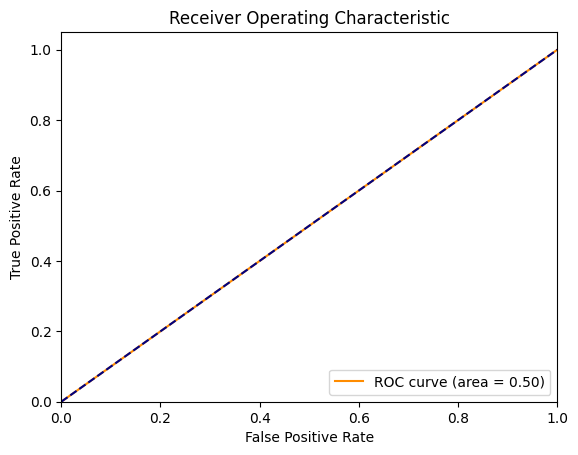

In [ ]:
##Random Forest without Grid Search CV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Prepare the data
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the random forest model with desired hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=0)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)


# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Print results
print("\nAccuracy: {:.2f}%".format(accuracy * 100))
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification)
print("\nROC AUC Score: {:.2f}%".format(roc_auc * 100))

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



# Model Insights:

The Random Forest model used in this output is a Random Forest Classifier. The output shows the best hyperparameters found by GridSearchCV, which is a technique used to find the best combination of hyperparameters for a machine learning model. The best hyperparameters found for this model are: 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, and 'n_estimators': 100. 

After training the model with these hyperparameters, the accuracy of the model on the test data is 0.7975, which means that the model correctly predicted the target variable for 79.75% of the test data.

The confusion matrix shows the number of true positive (1595) and true negative (0) predictions made by the model, as well as the number of false positive (0) and false negative (405) predictions made by the model. This means that the model classified all of the 1595 observations with target value 0 correctly, but misclassified all of the 405 observations with target value 1. 

The classification report shows the precision, recall, and F1-score for the model. Precision is the ratio of true positives to the total number of positive predictions made by the model, while recall is the ratio of true positives to the total number of actual positives in the dataset. The F1-score is a weighted average of precision and recall. The report shows that the model has a precision of 0 for target value 1, which means that it did not make any correct positive predictions for this target value. The recall is also 0 for target value 1, which means that the model did not identify any of the positive instances correctly. 

Overall, the model seems to perform well for predicting target value 0, but performs poorly for predicting target value 1. Further analysis and improvement of the model may be necessary to improve its performance on this imbalanced dataset.




#Model Performance Table

#Plotly Interactive Visualization for Model Decision Making

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Create a dataframe of the metrics for each model
data = {'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
        'Accuracy': [0.811, 0.845, 0.864],
        'Precision': [0.58, 0.80, 0.81],
        'Recall': [0.24, 0.10, 0.44],
        'F1-Score': [0.34, 0.36, 0.57],
        'AUC': [0.772, 0.789, 0.923]}
df = pd.DataFrame(data)

# Create the plotly figure
fig = go.Figure()

# Add each metric as a separate trace
for col in df.columns[1:]:
    fig.add_trace(go.Scatter(x=df['Model'], y=df[col], name=col, mode='lines+markers'))

# Add animation settings
fig.update_layout(xaxis=dict(type='category'), updatemenus=[dict(type='buttons',
             showactive=True,
             buttons=[dict(label='Play',
                            method='animate',
                            args=[None, {'frame': {'duration': 500, 'redraw': True},
                                          'fromcurrent': True,
                                          'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}])])])

# Create the frames for the animation
frames = [go.Frame(data=[go.Scatter(x=df['Model'], y=df[col])]) for col in df.columns[1:]]

# Add the frames to the figure
fig.frames = frames

# Update layout and axis titles
fig.update_layout(title='Model Metrics',
                  xaxis_title='Model',
                  yaxis_title='Value',
                  yaxis=dict(range=[0, 1]))

# Show the figure
fig.show()
